In [8]:
from keras.layers import Dense, PReLU, LeakyReLU
from tensorflow.keras.models import Sequential
import numpy as np
from keras import optimizers
from keras.regularizers import l2

In [11]:
###   shape_of_Landmarks = it will be the shap of TUPLE of landmarks from each image.

shape_of_Landmarks = (68,)
model = Sequential()
model.add(Dense(200, input_shape = shape_of_Landmarks, kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01)))
model.add(PReLU(alpha_initializer = 'zeros'))
model.add(Dense(20, use_bias = True))
model.add(LeakyReLU(alpha = 0.3))
model.add(Dense(7, activation = "softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               13800     
_________________________________________________________________
p_re_lu (PReLU)              (None, 200)               200       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                4020      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 147       
Total params: 18,167
Trainable params: 18,167
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=optimizers.RMSprop(lr=2e-5),  # change it to adagrad (lr = 0.001, initial_accumulator_valur = 0.1, epsilon = 1e-07)
                  metrics=['accuracy'])
    
model.fit(train_landmarks, emotions, epochs = 1500, validation_split = 0.05)

##  here, train_landmark and emotions are in same order that is the index

In [53]:
import os
import argparse
import imutils
from imutils import face_utils

import numpy as np 
import pandas as pd 


path = 'D:\Emoji generation Project_Pycharm\dataset'
os.listdir(path)
data = pd.read_csv(path+'\icml_face_data.csv')

data.head()


def prepare_data(data):
    """ Prepare data for modeling
        input: data frame with labels und pixel data
        output: image and label array """

    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, ' pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

data[' Usage'].value_counts()

emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

train_image_array, train_image_label = prepare_data(data[data[' Usage']=='Training'])
val_image_array, val_image_label = prepare_data(data[data[' Usage']=='PrivateTest'])
test_image_array, test_image_label = prepare_data(data[data[' Usage']=='PublicTest'])

train_images = train_image_array.reshape((train_image_array.shape[0], 48, 48, 1))
#train_images = train_images.astype('float32')/255
val_images = val_image_array.reshape((val_image_array.shape[0], 48, 48, 1))
#val_images = val_images.astype('float32')/255
test_images = test_image_array.reshape((test_image_array.shape[0], 48, 48, 1))
#test_images = test_images.astype('float32')/255

#print(np.shape(train_images))
#print(np.shape(train_labels))




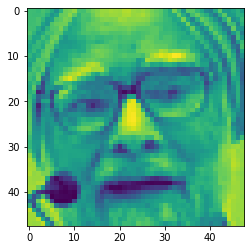

In [55]:
#import cv2
poo=np.array(train_images[1])
import matplotlib.pyplot as plt
poo = np.resize(poo,(48,48,1))
#poo = cv2.threshold(poo, 100,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
plt.imshow(poo)
#print(poo)